## Assignment
### Channa Dissanyaka

**1. Load and Explore the Dataset**

In [198]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

In [199]:
# Load Iris dataset
iris = load_iris()

# Convert to DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [200]:
# Printing the first 5 rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [201]:
data.shape

(150, 5)

In [202]:
# Checking the basic statistics
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [203]:
# Checking null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [204]:
# Finding duplicate rows

duplicate_rows = data.duplicated()

# Count total duplicate rows
total_duplicates = duplicate_rows.sum()
print(total_duplicates)

1


In [205]:
# Dropping duplicaes
data = data.drop_duplicates()

In [206]:
# Finding duplicate rows after dropping them

duplicate_rows = data.duplicated()

# Count total duplicate rows
total_duplicates = duplicate_rows.sum()
print(total_duplicates)

0


In [207]:
data.shape

(149, 5)

**2. Data Preprocessing**

In [208]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


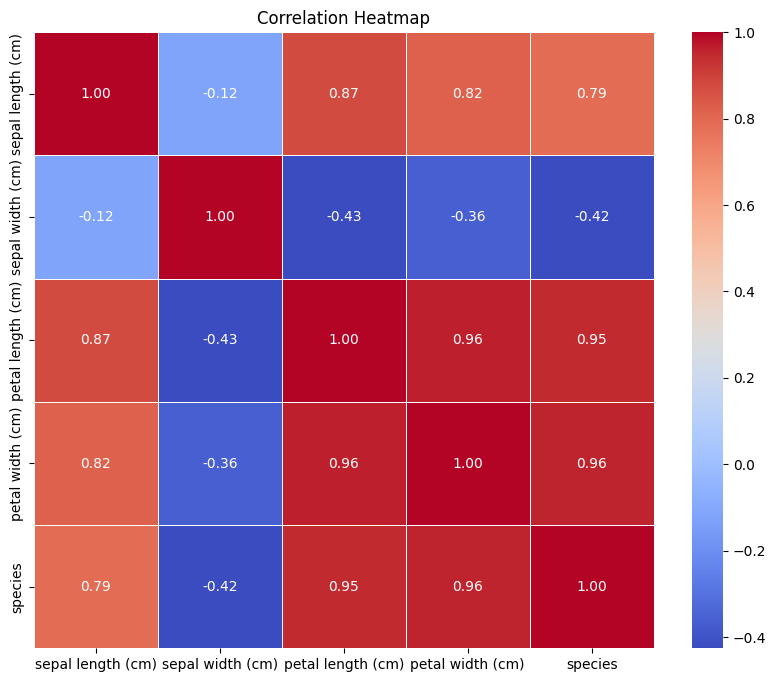

In [209]:
# Drawing a heatmap
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

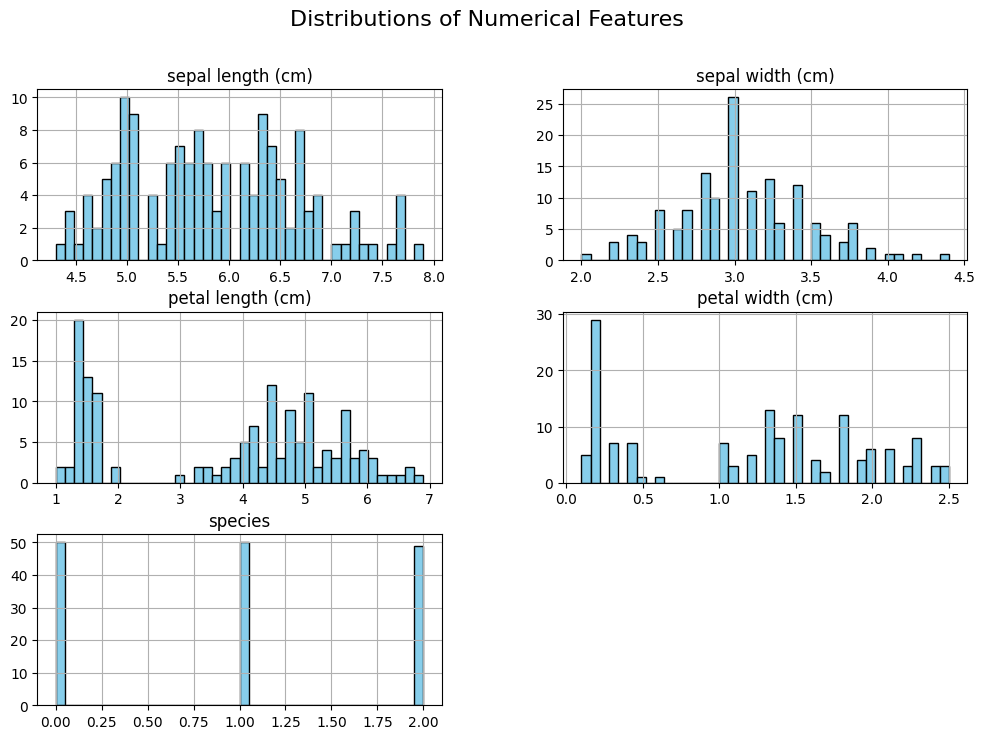

In [210]:
# Plot histograms for each numerical feature
data.hist(bins=40, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()


In [211]:
# Seperating features and target
X = data.drop('species', axis=1)
y = data['species'] 

In [212]:
# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Building the ML model**

In [213]:
models = {
    'Random_Forest': RandomForestClassifier(
        n_estimators=50,            # Reduce number of trees
        max_depth=5,                # Keep depth shallow to reduce overfitting
        min_samples_split=4,        # Set a minimum number of samples required to split an internal node
        min_samples_leaf=2,         # Set a minimum number of samples required to be at a leaf node
        max_features='sqrt',        # Use sqrt of features to prevent overfitting
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=50,            # Reduce the number of trees
        max_depth=4,                # Lower max depth
        learning_rate=0.1,          # Reduce learning rate
        subsample=0.8,              # Use 80% of the data to train each tree
        colsample_bytree=0.8,       # Use 80% of features for each tree
        reg_lambda=1,               # L2 regularization
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=50,            # Reduce the number of trees
        learning_rate=0.5,          # Reduce learning rate to prevent overfitting
        random_state=42
    ),
    'Gradient_Boosting': GradientBoostingClassifier(
        n_estimators=50,            # Reduce the number of trees
        max_depth=3,                # Shallow trees
        learning_rate=0.05,         # Lower learning rate
        min_samples_split=4,        # Minimum samples required to split a node
        min_samples_leaf=2,         # Minimum samples required to be at a leaf node
        random_state=42
    )
}


Random_Forest Model
Train Accuracy: 0.98
Test Accuracy: 1.00
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



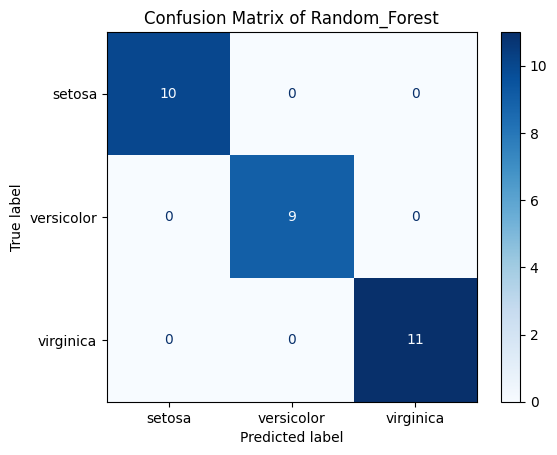

XGBoost Model
Train Accuracy: 0.99
Test Accuracy: 1.00
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



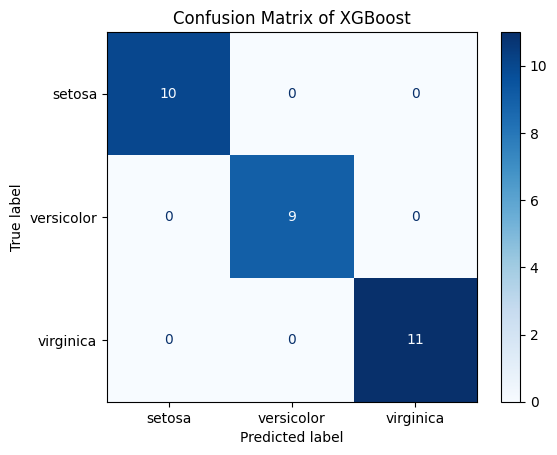

AdaBoost Model
Train Accuracy: 0.94
Test Accuracy: 1.00
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



e:\Anaconda\envs\ANN\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


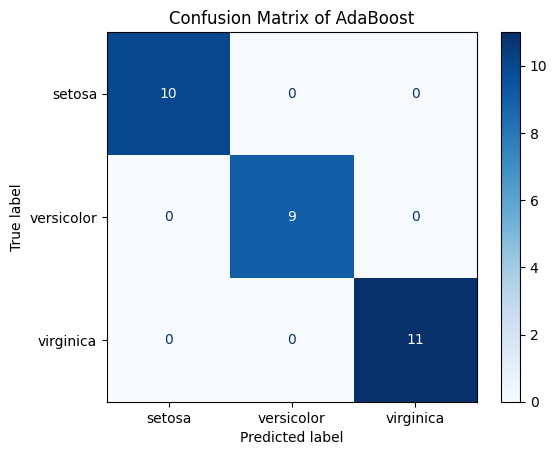

Gradient_Boosting Model
Train Accuracy: 1.00
Test Accuracy: 1.00
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



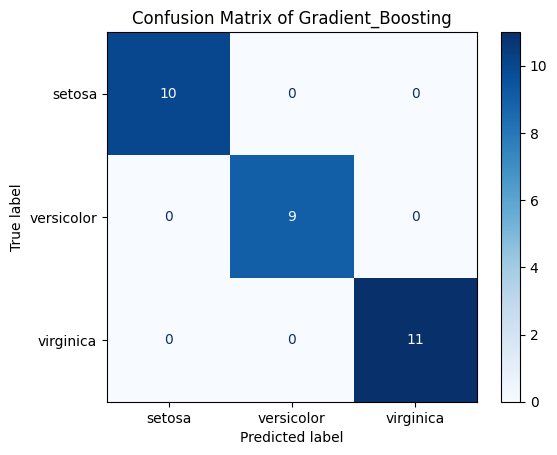

In [214]:
# Training and evaluating
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print results
    print(f"{name} Model")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("Classification Report (Test Data):")
    print(classification_report(y_test, y_test_pred))
    

    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix of {name}")
    plt.show()

    print("="*50)

**5. Save the Model for Future Use**

From the heatmap we plotted, it looks like the feature petal length (cm) and petal width (cm) are highly correlated with the target variable species, with correlations near 1. Additionally, sepal length (cm) and petal length (cm) also have high correlations. The high correlations between the features and the target variable can caused  models'  100% accuracy.

In [215]:
joblib.dump(RandomForestClassifier, 'Random_forest.joblib')
joblib.dump(XGBClassifier, 'XGBClassifier.joblib')
joblib.dump(AdaBoostClassifier, 'AdaBoost.joblib')
joblib.dump(GradientBoostingClassifier, 'GradientBoost.joblib')

['GradientBoost.joblib']